In [1]:
import pandas as pd

# Exemplo: se o arquivo estiver na mesma pasta do notebook
df = pd.read_csv("base.csv")

# 🛠️ Feature Engineering para Previsão de Attrition

Neste notebook, criamos novas variáveis (features) com o objetivo de melhorar a capacidade preditiva dos modelos de machine learning.
Cada feature é justificada com base em hipóteses de negócio.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura da base original
df = pd.read_csv("base.csv")

## 1. Interações entre Tempo e Experiência

In [3]:
# Proporção de tempo no cargo atual
# Pode indicar instabilidade ou promoções recentes
df['YearsInCurrentRoleRatio'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1)

# Experiência proporcional à idade
df['ExperiencePerAge'] = (df['TotalWorkingYears'] + 1) / (df['Age'] + 1)

## 2. Satisfação e Performance Combinadas

In [4]:
# Índice geral de satisfação
df['OverallSatisfaction'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

# Diferença entre satisfação e performance (gap)
df['SatisfactionPerformanceGap'] = df['OverallSatisfaction'] - df['PerformanceRating']

## 3. Tempo de Empresa Relativo

In [5]:
# Tempo na empresa em relação à idade
df['YearsInCompanyToAge'] = df['YearsAtCompany'] / (df['Age'] + 1)

# Tempo sem promoção relativo ao tempo total na empresa
df['YearsSincePromotionRatio'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)

# Faixas de tempo de empresa
df['TenureBucket'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 2, 5, 10, 40],
    labels=['0-2 anos', '3-5 anos', '6-10 anos', '10+ anos']
)

## 4. Transformações de Variáveis Categóricas

In [6]:
# Identifica cargos de gerência ou diretoria
df['IsManager'] = df['JobRole'].isin(['Manager', 'Director']).astype(int)

# Viaja frequentemente a trabalho
df['TravelHighFreq'] = (df['BusinessTravel'] == 'Travel_Frequently').astype(int)

# Solteiro e fazendo hora extra (risco potencial)
df['IsSingleOverTime'] = ((df['MaritalStatus'] == 'Single') & (df['OverTime'] == 'Yes')).astype(int)

## ✅ Verificação das Novas Features Criadas

In [7]:
# Visualizar as 10 novas colunas
novas_colunas = ['YearsInCurrentRoleRatio', 'ExperiencePerAge', 'OverallSatisfaction',
                 'SatisfactionPerformanceGap', 'YearsInCompanyToAge', 'YearsSincePromotionRatio',
                 'IsManager', 'TravelHighFreq', 'IsSingleOverTime', 'TenureBucket']
df[novas_colunas].describe()

,YearsInCurrentRoleRatio,ExperiencePerAge,OverallSatisfaction,SatisfactionPerformanceGap,YearsInCompanyToAge,YearsSincePromotionRatio,IsManager,TravelHighFreq,IsSingleOverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.480701,0.308434,2.720862,-0.432880,0.181909,0.236458,0.069388,0.188435,0.089116
std,0.274128,0.147040,0.628240,0.734979,0.138538,0.269358,0.254199,0.391193,0.285008
min,0.000000,0.035714,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.206897,2.333333,-1.000000,0.076923,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.285714,2.666667,-0.333333,0.151515,0.142857,0.000000,0.000000,0.000000
75%,0.666667,0.411765,3.333333,0.000000,0.258065,0.428571,0.000000,0.000000,0.000000
max,0.882353,0.694915,4.000000,1.000000,0.677966,0.916667,1.000000,1.000000,1.000000


## 🔍 Visualização de Impacto: Exemplos

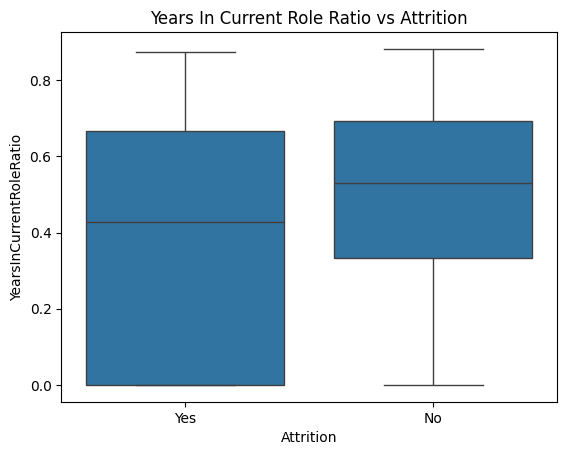

In [8]:
sns.boxplot(x='Attrition', y='YearsInCurrentRoleRatio', data=df)
plt.title('Years In Current Role Ratio vs Attrition')
plt.show()

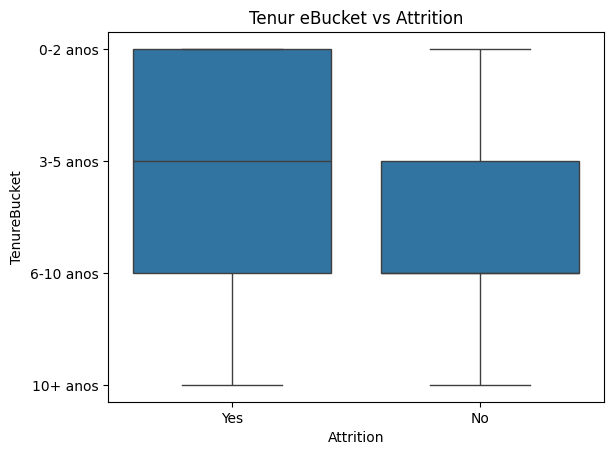

In [9]:
sns.boxplot(x='Attrition', y='TenureBucket', data=df)
plt.title('Tenur eBucket vs Attrition')
plt.show()

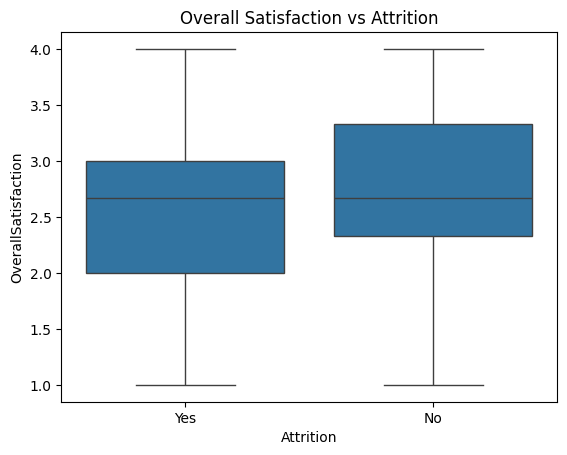

In [10]:
sns.boxplot(x='Attrition', y='OverallSatisfaction', data=df)
plt.title('Overall Satisfaction vs Attrition')
plt.show()

--========================================================================================================